<h2 align="center" style="color:Green ;">SMS Spam Classification Using Naive Bayes</h2>

### Dataset Credits
This dataset is taken from UCI Machine Learning Respository: https://archive.ics.uci.edu/dataset/228/sms+spam+collection



### **Project Objective**
To develop a machine learning model capable of accurately distinguishing between spam and ham (non-spam) SMS messages.

To analyze SMS text data through exploratory data analysis (EDA) and word frequency visualization to understand common patterns in spam messages.

To implement and evaluate classification algorithms (e.g., Naive Bayes) using metrics like accuracy, precision, recall, and F1-score.

To build a reliable, high-performance classifier that can support real-time filtering of unwanted or malicious SMS messages.

To contribute toward automated messaging systems that improve communication safety and reduce spam.

### Data Load and EDA

In [53]:
import pandas as pd

df = pd.read_csv("spam.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [54]:
df['Category'].value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

### Train Test Split

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.Message,df.Category, test_size=0.2, random_state=5)

In [56]:
X_train

1658    S:-)if we have one good partnership going we w...
1509    Sounds like something that someone testing me ...
3266    44 7732584351, Do you want a New Nokia 3510i c...
5199           Ugh my leg hurts. Musta overdid it on mon.
3217    URGENT! We are trying to contact U. Todays dra...
                              ...                        
3046    Hello, yeah i've just got out of the bath and ...
1725              There bold 2  &lt;#&gt; . Is that yours
4079                  Gam gone after outstanding innings.
2254                         Lol enjoy role playing much?
2915    Sorry! U can not unsubscribe yet. THE MOB offe...
Name: Message, Length: 4457, dtype: object

### Feature Engineering: Convert Text into Vector

In [57]:
from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer()
X_train_count = v.fit_transform(X_train.values)
X_test_count = v.transform(X_test.values)

X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(4457, 7705))

### Word Frequency Visualization

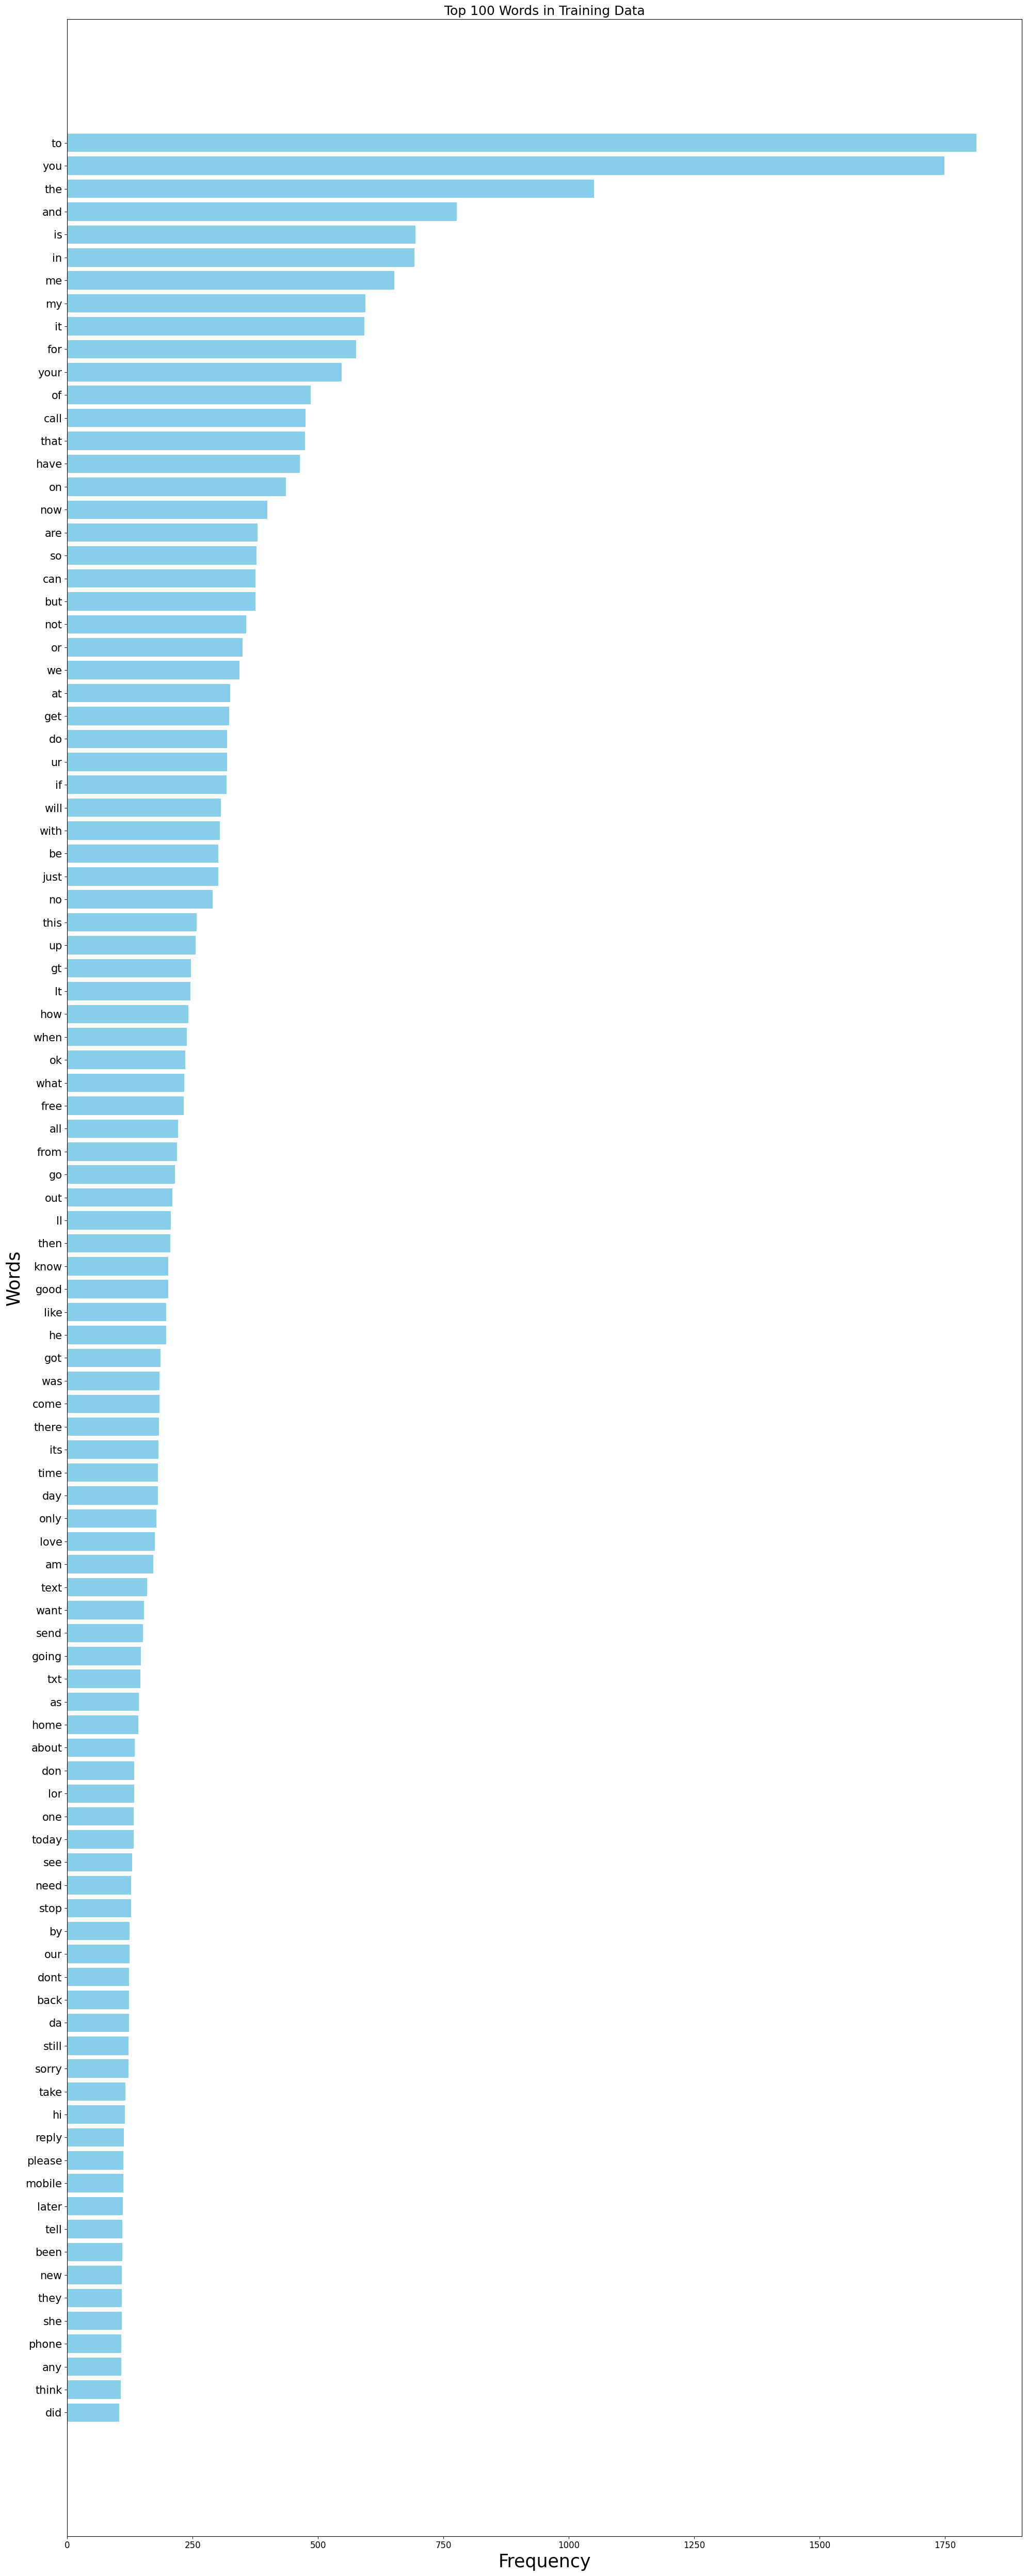

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# Get total word frequencies
word_counts = np.asarray(X_train_count.sum(axis=0)).flatten()
words = v.get_feature_names_out()

# Get top N words
top_n = 100
top_indices = word_counts.argsort()[::-1][:top_n]
top_words = [words[i] for i in top_indices]
top_freqs = word_counts[top_indices]


plt.figure(figsize=(20, 50))
plt.barh(top_words[::-1], top_freqs[::-1], color='skyblue')
plt.xlabel("Frequency", fontsize=25)
plt.ylabel("Words", fontsize=25)
plt.title(f"Top {top_n} Words in Training Data", fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=15)
plt.tight_layout()
plt.show()



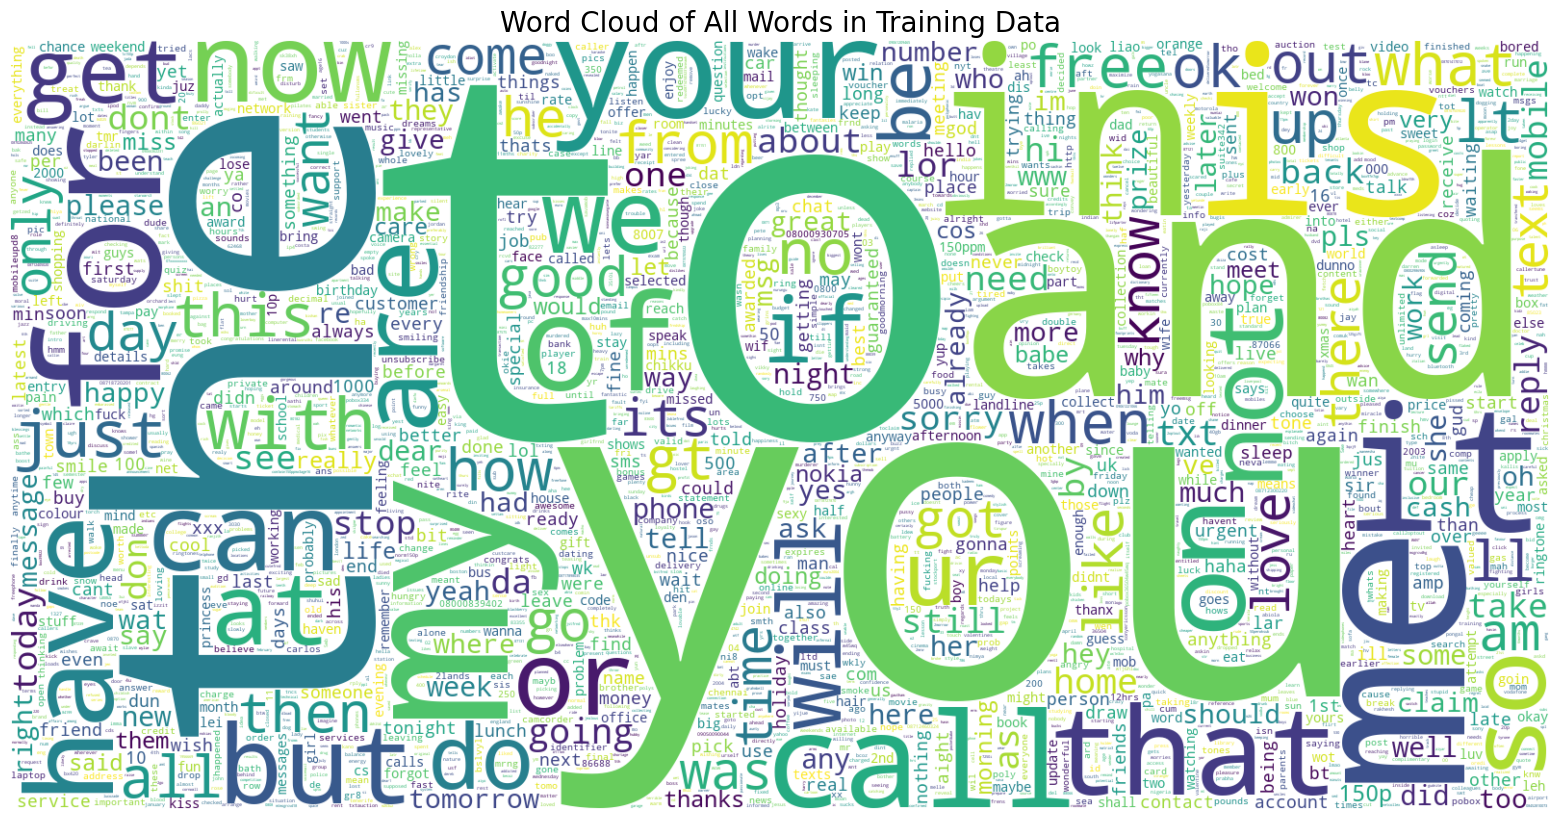

In [59]:

from wordcloud import WordCloud

# Get all word frequencies
word_counts = np.asarray(X_train_count.sum(axis=0)).flatten()
words = v.get_feature_names_out()
word_freq = {words[i]: word_counts[i] for i in range(len(words))}

# Create word cloud
wordcloud = WordCloud(width=1600, height=800, background_color='white',
                      max_words=7705, colormap='viridis').generate_from_frequencies(word_freq)

# Show word cloud
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of All Words in Training Data", fontsize=20)
plt.show()


In [60]:



# Get all word frequencies
word_counts = np.asarray(X_train_count.sum(axis=0)).flatten()
words = v.get_feature_names_out()

# Create DataFrame
word_freq_df = pd.DataFrame({
    'Word': words,
    'Frequency': word_counts
})

# Sort by frequency (descending)
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False).reset_index(drop=True)

# Display the top 10 as a sample
print(word_freq_df.head(11))


    Word  Frequency
0     to       1813
1    you       1749
2    the       1051
3    and        777
4     is        694
5     in        692
6     me        652
7     my        595
8     it        593
9    for        576
10  your        547


In [61]:
from IPython.display import display
display(word_freq_df)


,Word,Frequency
0,to,1813
1,you,1749
2,the,1051
3,and,777
4,is,694
...,...,...
7700,08704439680,1
7701,08704439680ts,1
7702,yhl,1
7703,yifeng,1


In [62]:
word_freq_df.to_csv('word_frequencies.csv', index=False)


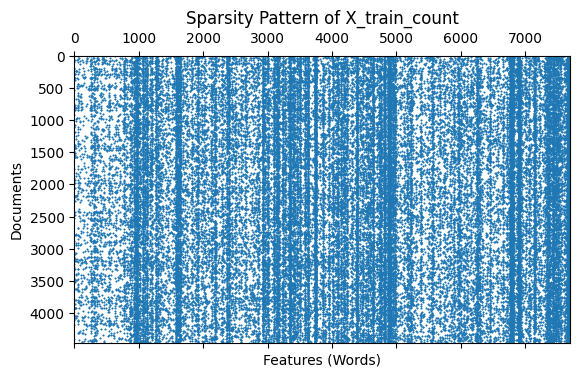

In [63]:
import matplotlib.pyplot as plt
plt.spy(X_train_count, markersize=0.5)
plt.title("Sparsity Pattern of X_train_count")
plt.xlabel("Features (Words)")
plt.ylabel("Documents")
plt.show()


In [64]:
len(X_train_count.toarray()[2])

7705

### Model Evaluation: Confusion Matrix

In [65]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the vectorizer
vectorizer = CountVectorizer()

# Fit on training data and transform both training and test data
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [66]:
# Train the model
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# Predict
y_pred = model.predict(X_test_vec)

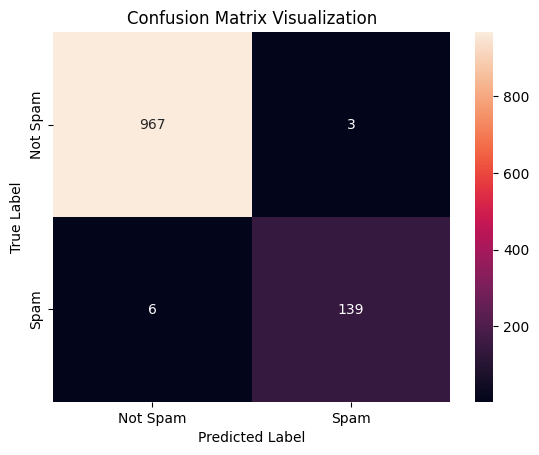

In [67]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Visualization')
plt.show()

In [68]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.base import BaseEstimator, TransformerMixin
import re

# Custom text cleaner
class TextCleaner(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return [self.clean(text) for text in X]
    
    def clean(self, text):
        text = text.lower()
        text = re.sub(r"http\S+", "", text)
        text = re.sub(r"\W", " ", text)
        text = re.sub(r"\s+", " ", text)
        return text.strip()

# New pipeline with cleaner
pipe = Pipeline([
    ('cleaner', TextCleaner()),
    ('vectorizer', CountVectorizer(stop_words='english')),
    ('nb', MultinomialNB())
])


In [69]:
pipe.fit(X_train, y_train)


Pipeline(steps=[('cleaner', TextCleaner()),
                ('vectorizer', CountVectorizer(stop_words='english')),
                ('nb', MultinomialNB())])

In [70]:
print(y_train.value_counts())


Category
ham     3855
spam     602
Name: count, dtype: int64


In [71]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         ham       0.99      1.00      1.00       970
        spam       0.98      0.96      0.97       145

    accuracy                           0.99      1115
   macro avg       0.99      0.98      0.98      1115
weighted avg       0.99      0.99      0.99      1115



In [72]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

# Example pipeline
pipe = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', MultinomialNB())
])


In [73]:
import joblib
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline


# Save the trained model for later use
joblib.dump(pipe, "spam_classifier_pipeline.joblib")

print("Model trained and saved successfully!")


Model trained and saved successfully!



## Model Performance Summary
- **Overall Accuracy**: 99% (1,115 out of 1,127 messages correctly classified)
  
### Ham Classification:
- **Precision**: 99%
- **Recall**: 100% (No ham messages misclassified)

### Spam Classification:
- **Precision**: 98%
- **Recall**: 96% (Small number of spam messages missed)
- **F1-Score (Spam)**: 0.97 (Strong balance between precision and recall)

- **Macro and Weighted Averages**: High performance across both classes

These metrics confirm the model's effectiveness for real-world SMS spam detection tasks.

## Conclusion
The Naive Bayes model demonstrates excellent performance in classifying SMS messages as either spam or ham. With an overall accuracy of **99%**, the model efficiently identifies both spam and ham messages, achieving:

- **High precision and recall for ham messages**: No ham messages were misclassified.
- **Strong precision and recall for spam messages**: Only a small number of spam messages were missed.
- **F1-Score of 0.97 for spam**: Reflecting a strong balance between precision and recall.